In [33]:
import strawberryfields as sf
from strawberryfields.ops import *
import numpy as np
import matplotlib.pyplot as plt

# BOSON SAMPLER

### Circuit for Boson Sampling

In [12]:
def boson_sampler(in_state,depth):
    theta = np.random.random()
    theta = 2*theta*np.pi
    theta_phi = np.random.rand(2)
    theta_phi = np.pi*theta_phi[0],2*np.pi*theta_phi[1]
    
    m = len(in_state)
    boson_sampling = sf.Program(m)
    
    with boson_sampling.context as q:
        j = 0
        for i in in_state: 
            Fock(int(i)) | q[j]
            j+=1
            
        for i in range(m):     
            Rgate(theta)  | q[i]

        for _ in range(depth):
            for i in range(m-1):
                BSgate(theta_phi[0],theta_phi[1]) | (q[i],q[i+1])

        MeasureFock() | q

    eng = sf.Engine(backend="fock", backend_options={"cutoff_dim": 5})
    results = eng.run(boson_sampling)
    
    return results.samples

### Von-Neumann Post Processing

In [39]:
def post_processing(state,depth):
    while True:
        s1 = boson_sampler(state,depth)
        s2 = boson_sampler(state,depth)

        bits = ''
        for s1, s2 in zip(s1[0],s2[0]):
            if s1 == 0 and s2 != 0:
                bits+='1'
            elif s2 == 0 and s1 != 0:
                bits+='0'

        if bits != '': break
    num = int(bits,2)
    return num

### Generating Random Numbers

In [40]:
def random_numbers(numbers,state,depth):
    num = []
    for i in range(numbers):
        no = post_processing(state,depth)
        num.append(no)
    return num

In [49]:
numbers1 = random_numbers(10,'10101',2)
print(numbers1)

[10, 3, 5, 1, 1, 2, 1, 1, 9, 2]


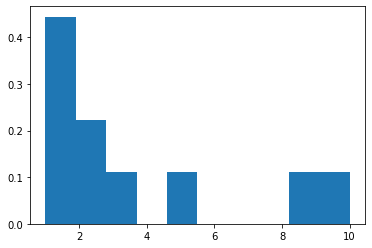

In [50]:
plt.hist(numbers1, 10, density=True)
plt.show()